In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import time, pickle
from sklearn.externals import joblib
import numpy as np
np.set_printoptions(precision=3, linewidth=200, suppress=True)
from sklearn.metrics import classification_report, accuracy_score

In [3]:
from library.datasets.cifar10 import CIFAR10
from library.plot_tools import plot
from library.utils import file_utils

In [6]:
dataset = 'cifar10'
file_no = 203
exp_no = 1
total_time = 0

In [7]:
model_folder = '../logs/' + dataset + '/' + str(file_no).zfill(3) + '_tfl_cnn/exp_no_' + str(exp_no).zfill(3) + '/'
model_name = nodel_folder + 'residual_net_classifier.pkl'

In [10]:
train_val_split_data = None
one_hot = True
num_images_required = 0.0
transform = True
transform_method = 'StandardScaler'

In [11]:
start = time.time()
one_hot = True
cifar10 = CIFAR10(one_hot_encode=one_hot, num_images=num_images_required, preprocess='StandardScaler',
                  train_validate_split=train_val_split_data, endian='little')
cifar10.load_data(train=False, test=True, data_directory='./datasets/cifar10/')
end = time.time()
print('[ Step 1] Loaded CIFAR 10 Dataset in %.4f ms' %((end-start)*1000))
total_time += (end-start)

Loading CIFAR 10 Dataset
MD5sum of the file: ./datasets/cifar10/cifar-10.tar.gz is verified
Loading 10000 test images
Loading CIFAR 10 Test Dataset
Unpickling test file: ./datasets/cifar10/cifar-10-batches/test_batch
Reading unpicked test file: ./datasets/cifar10/cifar-10-batches/test_batch


/net/voxel03/misc/me/praneethas/Softwares/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Loaded CIFAR 10 Dataset in 1.2962 seconds
[ Step 1] Loaded CIFAR 10 Dataset in 1296.9105 ms


In [ ]:
model = joblib.load(model_name)

In [ ]:
prediction_numbers = model.predict(cifar10.test.images)

In [17]:
prediction_classes = []
num_test_images = cifar10.test.data.shape[0]
for i in range(num_test_images):
    prediction_classes.append(cifar10.classes[int(prediction_numbers[i])])

In [18]:
test_accuracy = accuracy_score(cifar10.test.class_labels, prediction_numbers)
print('Accuracy of the classifier on test dataset: %.4f' % test_accuracy)

Accuracy of the classifier on test dataset: 0.3504


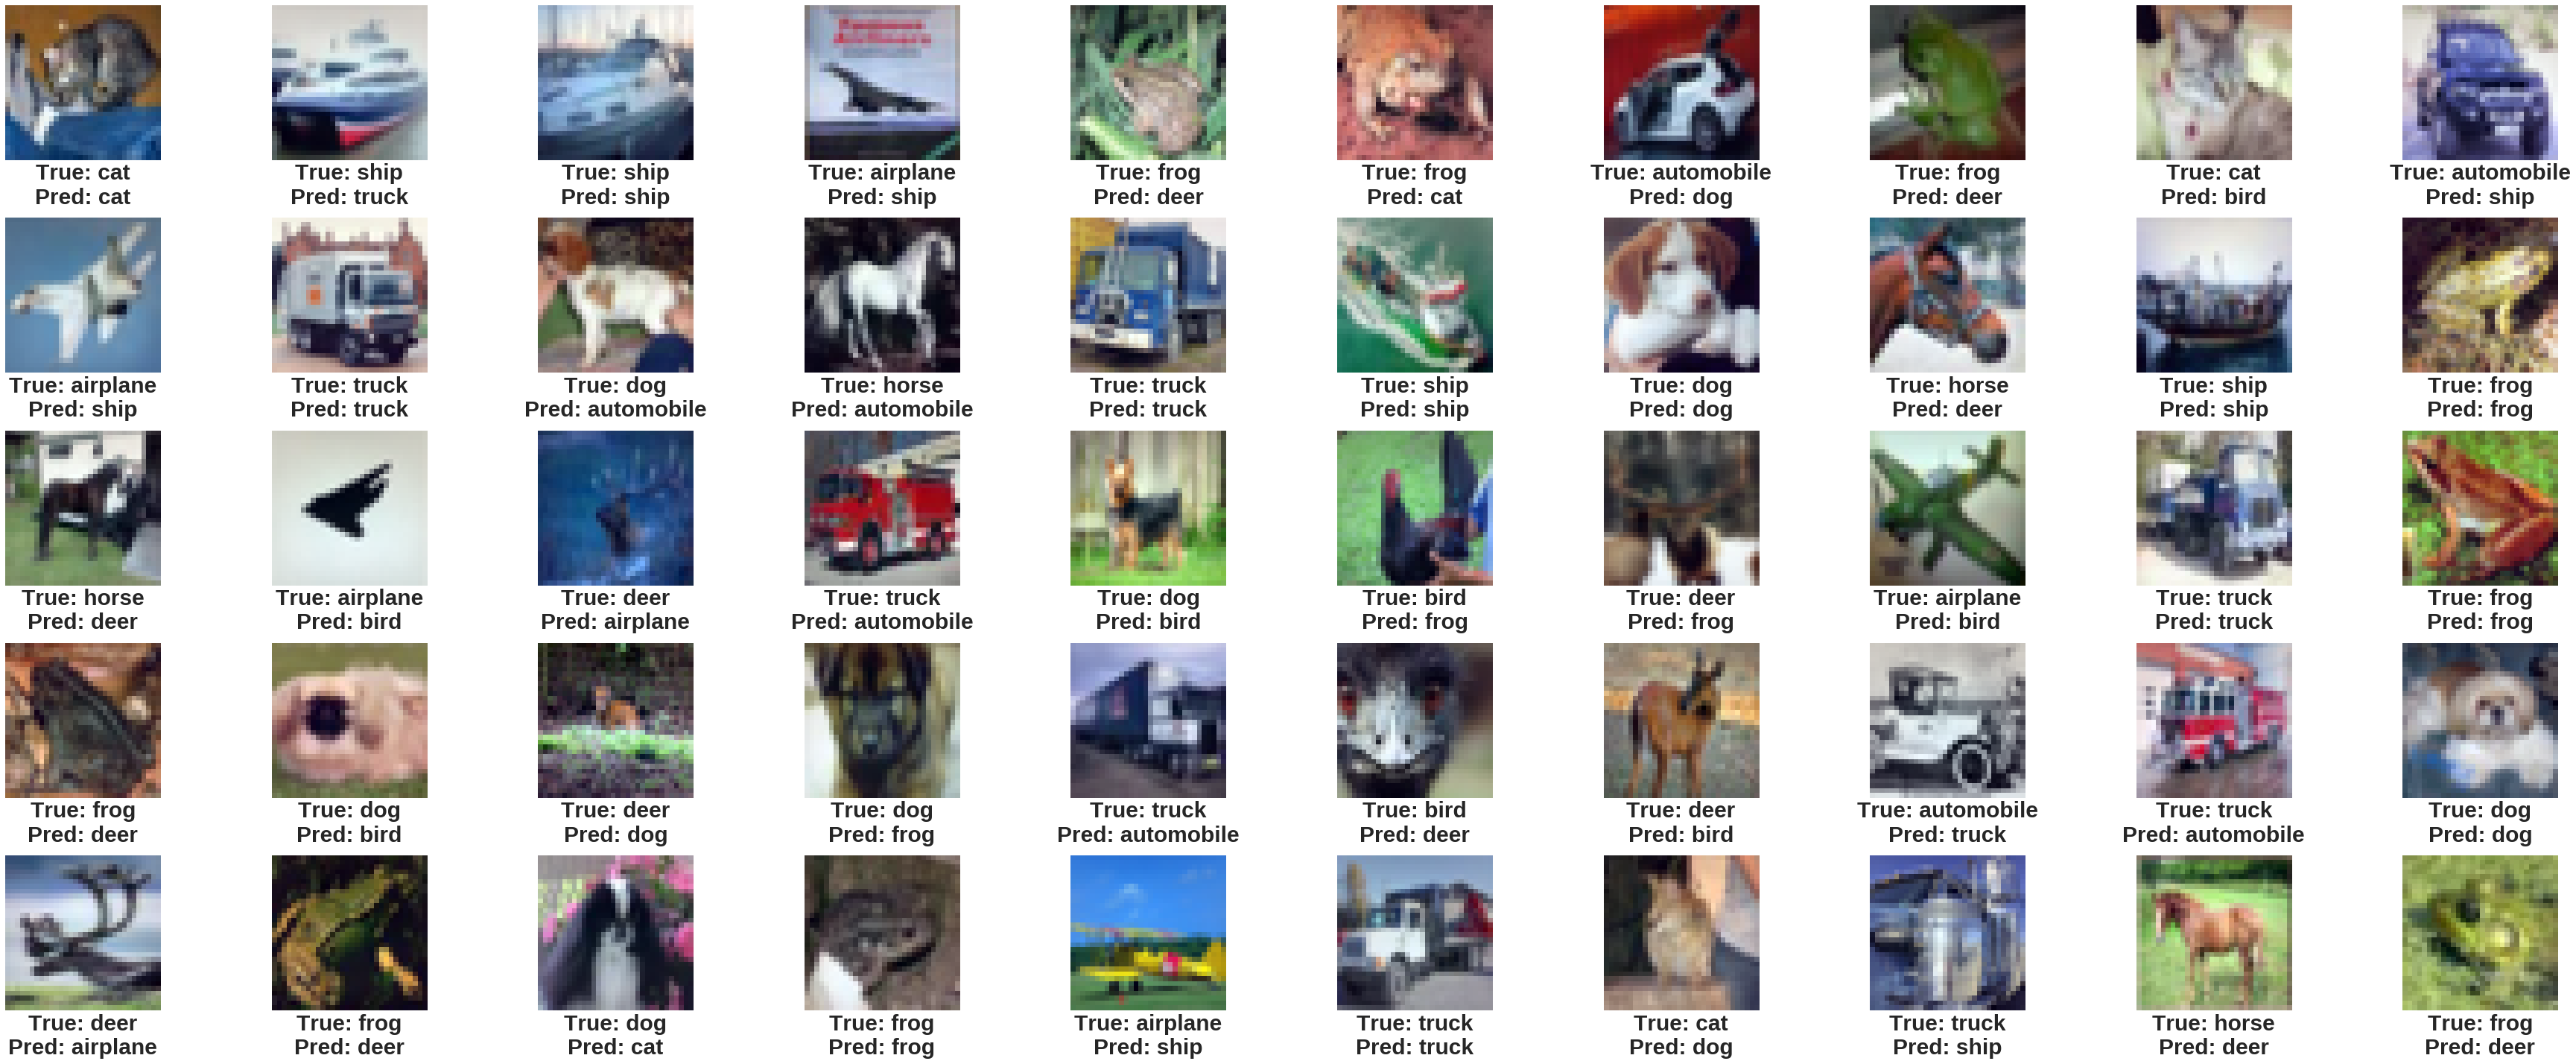

True

In [19]:
cifar10.plot_images(cifar10.test.data[:50], cifar10.test.class_names[:50], cls_pred=prediction_classes[:50], 
                    nrows=5, ncols=10, fig_size=(20,50), fontsize=30, convert=True)

Confusion matrix, without normalization
[[254  57  68  15  36  65  22  48 354  81]
 [ 33 401  24  29  77  37  40  31 127 201]
 [ 62  33 227  67 246  85 104  63  87  26]
 [ 22  63  84 149 176 211 116  61  47  71]
 [ 31  38 126  41 446  69  95  73  43  38]
 [ 16  43 118 105 163 321  91  55  56  32]
 [  7  57  73  69 271  62 354  20  21  66]
 [ 28  54  59  47 193  67  54 333  72  93]
 [ 80  81  17  18  29  63  14  19 583  96]
 [ 37 164  22  25  53  29  38  42 154 436]]
Normalized confusion matrix
[[ 0.254  0.057  0.068  0.015  0.036  0.065  0.022  0.048  0.354  0.081]
 [ 0.033  0.401  0.024  0.029  0.077  0.037  0.04   0.031  0.127  0.201]
 [ 0.062  0.033  0.227  0.067  0.246  0.085  0.104  0.063  0.087  0.026]
 [ 0.022  0.063  0.084  0.149  0.176  0.211  0.116  0.061  0.047  0.071]
 [ 0.031  0.038  0.126  0.041  0.446  0.069  0.095  0.073  0.043  0.038]
 [ 0.016  0.043  0.118  0.105  0.163  0.321  0.091  0.055  0.056  0.032]
 [ 0.007  0.057  0.073  0.069  0.271  0.062  0.354  0.02   0.02

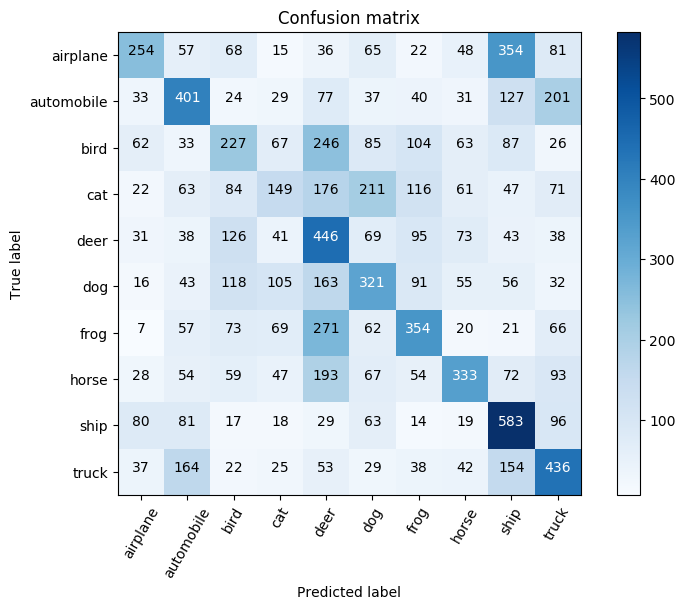

In [20]:
plot.plot_confusion_matrix(cifar10.test.class_labels, prediction_numbers, classes=cifar10.classes,
                           normalize=True, title='Confusion matrix')

In [21]:
print('Detailed classification report')
print(classification_report(y_true=cifar10.test.class_labels, y_pred=prediction_numbers,
                            target_names=cifar10.classes))

Detailed classification report
             precision    recall  f1-score   support

   airplane       0.45      0.25      0.32      1000
 automobile       0.40      0.40      0.40      1000
       bird       0.28      0.23      0.25      1000
        cat       0.26      0.15      0.19      1000
       deer       0.26      0.45      0.33      1000
        dog       0.32      0.32      0.32      1000
       frog       0.38      0.35      0.37      1000
      horse       0.45      0.33      0.38      1000
       ship       0.38      0.58      0.46      1000
      truck       0.38      0.44      0.41      1000

avg / total       0.36      0.35      0.34     10000



In [22]:
sess.close()